## Introduction to logistic regression

During this practical exercise a Logistic Regression (LR) model will be implemented from scratch to classify numbers from the MNIST data set.
The MNIST data set is a collection of handwritten numbers images (black and white) of a size of 28 x 28 pixels.

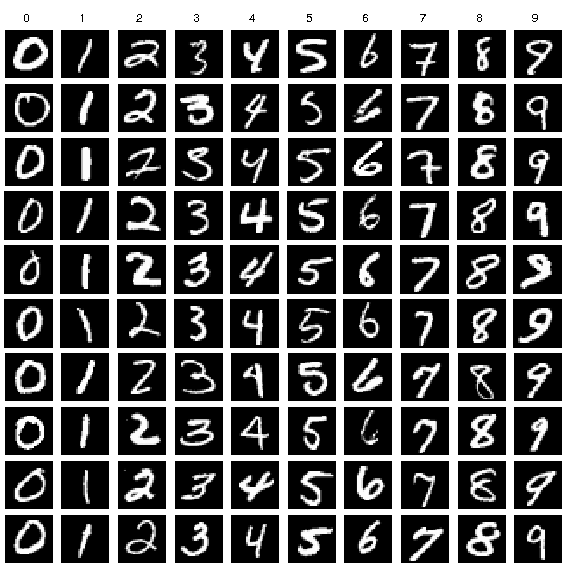

This logistic regression model will be implemented without using Logistic Regression functionalities of the pytorch framework, in order to gain a better understanding on how this logistic regression works on the background

### Step 1: Prepare the data

In [ ]:
# Acquire the dataset

import torch
from torchvision import datasets, transforms

dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

print("Images on dataset: ", len(dataset))
print("Images on test set: ", len(test_set))

In [ ]:
# Separate the dataset into training and validation-
# The function split indexes will return a list of indexes that are going to be used for validation and another for training.

import numpy as np

def split_idxs(set_size, percentage):
    # Size of validation data set
    val_size = int(percentage*set_size)
    # Create a random permutation of 0 to n-1
    idxs = np.random.permutation(set_size)
    # Pick first val_size indices for validation set
    return idxs[:val_size], idxs[val_size:]  # validation set idxs, training set idxs

val_idxs, train_idxs = split_idxs(len(dataset), 0.2)

In [ ]:
# Obtain a training and a validation set.
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size = 100

# Return a random samples of elements from the list of idxs
train_sampler = SubsetRandomSampler(train_idxs) 
# From the imgs create img_batches
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_idxs)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

#### Step by step example with one batch

In [ ]:
data_train_iter = iter(train_loader)
images, labels = data_train_iter.next()

In [ ]:
images.shape   #[batch_size, color_channels, width, height]

In [ ]:
# Recalling to the structure of a LR network, the input is one dimentional, so we reshape the input 
x = images.view(-1, 28*28)
x.shape

### Step 2: Generate predictions

In [ ]:
# Initialize weights and biases
w = torch.randn(784, 10)/np.sqrt(784) # (array_size, amount of classes)
w.requires_grad_()

b = torch.zeros(10, requires_grad=True)

In [ ]:
# Prediction of first batch
y = x @ w + b

In [ ]:
# Prediction of image 1
print(y[1,:])

In [ ]:
# Use softmax function to translate output to percentages
import torch.nn.functional as F
y_pct = F.softmax(y, dim=1)
print(y_pct[1])
print("expected: {}".format(labels[1]))
print("predicted: {}".format(torch.argmax(y_pct[1])))

### Step 3. Calculate the loss

In [ ]:
cross_entropy = F.cross_entropy(y, labels)

In [ ]:
print(cross_entropy)

### Step 4. Calculate gradient descent - Back propagation

In [ ]:
# Define optimizer
optimizer = torch.optim.SGD([w, b], lr=0.1) #(model parameters, learning rate)

cross_entropy.backward()
# Update model parameters
optimizer.step() 


######            Important             #####
# Clear gradient buffer.
optimizer.zero_grad()

This gives us an idea of how LR is used.
This process should be repeated through all the batches. This could be through a for loop. But in the industry the built in functions of pytorch are used.


In [ ]:
# Train for all the dataset

from tqdm.notebook import tqdm

for images, labels in tqdm(train_loader):
    optimizer.zero_grad()
    
    #Forward
    x = images.view(-1, 28*28)
    y = torch.matmul(x, w) + b
    cross_entropy = F.cross_entropy(y, labels)
    
    #Backward
    cross_entropy.backward()
    optimizer.step()

### Testing

In [ ]:
correct=0
total = len(test_set)

test_loader = DataLoader(test_set, batch_size) 

with torch.no_grad():
  for images, labels in tqdm(test_loader):
    x = images.view(-1, 28*28)
    y = torch.matmul(x, w) + b

    predictions = torch.argmax(y, dim=1)
    correct += torch.sum((predictions == labels).float())

print('Test accuracy: {:.4f}'.format(correct/total))
